In [ ]:
from google.colab import files
uploaded=files.upload()

Saving layoffs1.csv to layoffs1 (1).csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import plotly.graph_objects as go
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
!pip install pycountry
import pycountry



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 22.4 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('layoffs1.csv')
df

,company,location,industry,total_laid_off,percentage_laid_off,Date,stage,country,funds_raised
0,OpenSea,New York City,Crypto,NaN,0.50,03-11-2023,Series C,United States,427.0
1,Viasat,San Diego,Other,800.0,0.10,02-11-2023,Post-IPO,United States,366.0
2,OpenSpace,SF Bay Area,Construction,NaN,NaN,02-11-2023,Series D,United States,200.0
3,Orchard,New York City,Real Estate,NaN,NaN,02-11-2023,Series D,United States,472.0
4,Informatica,SF Bay Area,Data,545.0,0.10,01-11-2023,Post-IPO,United States,NaN
...,...,...,...,...,...,...,...,...,...
3143,Service,Los Angeles,Travel,NaN,1.00,16-03-2020,Seed,United States,5.1
3144,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
3145,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
3146,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0


In [ ]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'Date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [ ]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2103.000000,2044.000000,2820.000000
mean,242.659058,0.273433,768.965779
std,778.254590,0.274940,4986.360121
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,50.000000
50%,80.000000,0.170000,157.950000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000


In [ ]:
df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1045
percentage_laid_off    1104
Date                      0
stage                     7
country                   0
funds_raised            328
dtype: int64

In [ ]:
df.dropna(subset=['total_laid_off', 'location', 'industry', 'stage'], inplace=True)
df

,company,location,industry,total_laid_off,percentage_laid_off,Date,stage,country,funds_raised
1,Viasat,San Diego,Other,800.0,0.10,02-11-2023,Post-IPO,United States,366.0
4,Informatica,SF Bay Area,Data,545.0,0.10,01-11-2023,Post-IPO,United States,NaN
5,Splunk,SF Bay Area,Data,500.0,0.07,01-11-2023,Post-IPO,United States,2400.0
6,Faire,SF Bay Area,Retail,250.0,0.20,01-11-2023,Series G,United States,1700.0
7,Sana Benefits,Austin,HR,73.0,0.50,01-11-2023,Series B,United States,106.0
...,...,...,...,...,...,...,...,...,...
3142,Help.com,Austin,Support,16.0,1.00,16-03-2020,Seed,United States,6.0
3144,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
3145,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
3146,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0


In [ ]:
median_percentage_laid_off = df['percentage_laid_off'].median()
median_funds_raised = df['funds_raised'].median()
df['percentage_laid_off'].fillna(median_percentage_laid_off, inplace=True)
df['funds_raised'].fillna(median_funds_raised, inplace=True)
df

,company,location,industry,total_laid_off,percentage_laid_off,Date,stage,country,funds_raised
1,Viasat,San Diego,Other,800.0,0.10,02-11-2023,Post-IPO,United States,366.0
4,Informatica,SF Bay Area,Data,545.0,0.10,01-11-2023,Post-IPO,United States,172.0
5,Splunk,SF Bay Area,Data,500.0,0.07,01-11-2023,Post-IPO,United States,2400.0
6,Faire,SF Bay Area,Retail,250.0,0.20,01-11-2023,Series G,United States,1700.0
7,Sana Benefits,Austin,HR,73.0,0.50,01-11-2023,Series B,United States,106.0
...,...,...,...,...,...,...,...,...,...
3142,Help.com,Austin,Support,16.0,1.00,16-03-2020,Seed,United States,6.0
3144,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
3145,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
3146,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0


<ipython-input-11-0be8654dc701>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['total_laid_off'], shade=True, label='total_laid_off')
<ipython-input-11-0be8654dc701>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['percentage_laid_off'], shade=True, label='percentage_laid_off')
<ipython-input-11-0be8654dc701>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['funds_raised'], shade=True, label='funds_raised')


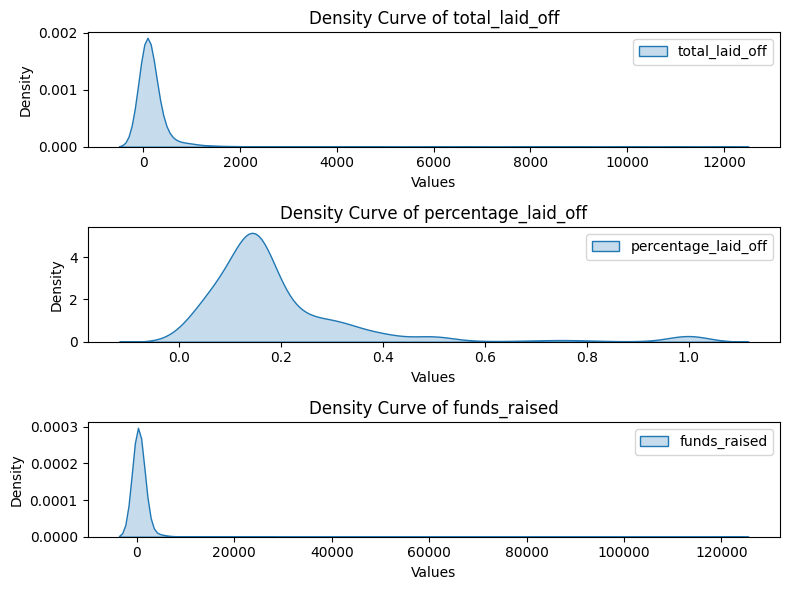

In [ ]:
# Plotting density curves for each column separately
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
sns.kdeplot(df['total_laid_off'], shade=True, label='total_laid_off')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Curve of total_laid_off')
plt.legend()

plt.subplot(3, 1, 2)
sns.kdeplot(df['percentage_laid_off'], shade=True, label='percentage_laid_off')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Curve of percentage_laid_off')
plt.legend()

plt.subplot(3, 1, 3)
sns.kdeplot(df['funds_raised'], shade=True, label='funds_raised')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Curve of funds_raised')
plt.legend()

plt.tight_layout()
plt.show()




In [ ]:
funds_raised_data = df['funds_raised']
percentage_laid_off_data = df['percentage_laid_off']

# Perform a two-sample t-test with handling of NaN values
t_statistic, p_value = stats.ttest_ind(funds_raised_data, percentage_laid_off_data, nan_policy='omit')

print("P-Value:", p_value)

alpha = 0.05
# Check the p-value
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between the means of funds raised and percentage laid off.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between the means of funds raised and percentage laid off.")


P-Value: 8.956209789752982e-12
Reject the null hypothesis
There is a significant difference between the means of funds raised and percentage laid off.


In [ ]:
if df['percentage_laid_off'].isnull().any() or df['funds_raised'].isnull().any():
    print("Warning: Missing values found in the dataset. Please handle missing data.")


# Check if there are still enough data points for analysis
if len(df) < 2:
    print("Insufficient data for linear regression analysis.")
else:
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df['percentage_laid_off'], df['funds_raised'])

    # Create scatter plot
    fig = px.scatter(df, x='percentage_laid_off', y='funds_raised',
                     title='Scatter Plot of Percentage Laid Off vs Funds Raised',
                     labels={'percentage_laid_off': 'Percentage Laid Off', 'funds_raised': 'Funds Raised'},
                     color='funds_raised',  # Color by funds raised
                     color_continuous_scale=px.colors.sequential.Viridis)  # Use a color scale

    # Add regression line
    fig.add_scatter(x=df['percentage_laid_off'], y=intercept + slope * df['percentage_laid_off'],
                    mode='lines', name='Linear Regression', line=dict(color='red'))

    # Add regression equation as an annotation
    fig.add_annotation(x=max(df['percentage_laid_off']), y=intercept + slope * max(df['percentage_laid_off']),
                       text=f'y={slope:.2f}x+{intercept:.2f}',
                       showarrow=False, yshift=10)

    # Improve layout
    fig.update_layout(autosize=True, hovermode='closest')

    # Display Pearson Correlation Coefficient and P-value
    if not np.isnan(r_value) and not np.isnan(p_value):
        fig.add_annotation(x=0.05, y=0.9, xref="paper", yref="paper",
                           text=f'Pearson r: {r_value:.2f} | P-value: {p_value:.2e}',
                           showarrow=False, bgcolor='white')
    else:
        print("Linear regression analysis could not be performed due to insufficient data.")

    fig.show()


In [ ]:
# Prepare the data for plotting (counting the occurrences of each industry)
industry_counts = df['industry'].value_counts().reset_index()
industry_counts.columns = ['industry', 'count']

fig = px.bar(industry_counts, y='industry', x='count', orientation='h',
             title='Count of Companies by Industry',
             labels={'count': 'Count of Companies', 'industry': 'Industry'},
             color='count',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  autosize=True,
                  plot_bgcolor='white',
                  showlegend=False)  # Hide the legend for a cleaner look

fig.show()

In [ ]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'Date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [ ]:
# Calculate the count for each country and keep the top 15
country_counts = df['country'].value_counts().nlargest(15).reset_index()
country_counts.columns = ['country', 'count']

# Create the count plot
fig = px.bar(country_counts, y='country', x='count',
             title='Count of Companies by Country - Top 15',
             labels={'count': 'Count of Companies', 'country': 'Country'},
             color='country',
             text='count')

fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  autosize=True,
                  plot_bgcolor='white',
                  showlegend=False)  # Hide the legend for a cleaner look

fig.show()


In [ ]:

# Filter the data for the top 5 sectors with the highest total layoffs
top_5_sectors = df.groupby('industry')['total_laid_off'].sum().nlargest(5).index.tolist()
filtered_data = df[df['industry'].isin(top_5_sectors)]

# Convert 'Date' column to datetime if not already in datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Group the data by date and sector to find total layoffs in each sector over time
sector_date_layoffs = filtered_data.pivot_table(index='Date', columns='industry', values='total_laid_off', aggfunc='sum')

# Resample the data to reduce Date to 3 months of difference
sector_date_layoffs_resampled = sector_date_layoffs.resample('3M').sum()

# Create a line plot using Plotly Express
fig = px.line(sector_date_layoffs_resampled, x=sector_date_layoffs_resampled.index, y=top_5_sectors,
              labels={'value': 'Total Laid Off', 'Date': 'Date'},
              title='Layoff Trends in Top 5 Sectors Over Time (Reduced to 3 Months Intervals)')

# Customize the layout
fig.update_layout(autosize=True, xaxis_title='Date', yaxis_title='Total Laid Off', legend_title='Sector')

# Show the plot
fig.show()

<ipython-input-17-4c00004178f9>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-17-4c00004178f9>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Convert it to datetime and set as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

monthly_layoffs_sum = df['total_laid_off'].resample('M').sum()

# Converting dates to ordinal numbers for regression analysis
x = np.array([d.toordinal() for d in monthly_layoffs_sum.index])
y = monthly_layoffs_sum.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

fig = go.Figure()

# Add Monthly Total Layoffs
fig.add_trace(go.Scatter(x=monthly_layoffs_sum.index, y=monthly_layoffs_sum,
                         mode='lines', name='Total Layoffs',
                         line=dict(color='#EF553B')))

# Add Best Fit Line
fig.add_trace(go.Scatter(x=monthly_layoffs_sum.index, y=intercept + slope * x,
                         mode='lines', name='Best Fit Line',
                         line=dict(color='#636EFA', dash='dash')))

fig.update_layout(height=600, width=800, title_text="Monthly Total Layoffs",
                  showlegend=True, plot_bgcolor='white',
                  xaxis_title='Date', yaxis_title='Total Laid Off')


fig.show()


<ipython-input-18-a287b6395b64>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [ ]:
# Grouping and summing layoffs by industry
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)
fig = px.bar(industry_layoffs, x=industry_layoffs.index, y=industry_layoffs,
             title='Total Layoffs by Industry',
             labels={'y': 'Total Laid Off', 'x': 'Industry'},
             text=industry_layoffs)  # Show values on bars

fig.update_traces(marker_color='rgb(55, 83, 109)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_tickangle=-45,
                  plot_bgcolor='white',
                  showlegend=False)
fig.show()


In [ ]:
pivot_table = df.pivot_table(values='total_laid_off', index='country', columns='industry', aggfunc='sum', fill_value=0)

styled_pivot_table = pivot_table.style.format("{:.0f}")

display(styled_pivot_table)


industry,AI,Aerospace,Construction,Consumer,Crypto,Data,Education,Energy,Finance,Fitness,Food,HR,Hardware,Healthcare,Infrastructure,Legal,Logistics,Manufacturing,Marketing,Media,Other,Product,Real Estate,Recruiting,Retail,Sales,Security,Support,Transportation,Travel
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,180,0,0,0,53,0,0,0,0,0,0,0,0,0,50,0,40,0,0,0,0,0,0,0,0,0
Australia,0,0,0,110,264,0,0,88,543,22,890,186,0,18,80,0,27,0,175,0,508,0,199,7,354,0,0,0,92,0
Austria,0,0,0,0,270,0,300,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,381,190,0,319,0,3671,467,675,68,0,311,0,0,800,0,327,0,243,0,1537,18,740,51,0,151,445,749
Bulgaria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Canada,0,0,293,22,102,45,612,47,777,0,913,9,50,146,30,30,65,0,652,125,346,114,191,86,4308,135,64,140,249,272
Cayman Islands,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,250,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
China,0,0,0,2445,575,0,0,0,0,0,0,0,900,500,0,0,0,0,0,200,1500,0,0,0,0,0,0,0,0,0


In [ ]:
# Sorting the data to find top countries with layoffs
top_countries = df.groupby('country')['total_laid_off'].sum().nlargest(5).index

# Creating an empty DataFrame to store top 5 sectors for each top country
top_5_sectors_df = pd.DataFrame()

for country in top_countries:
    country_data = df[df['country'] == country]
    top_5_sectors = country_data.groupby('industry')['total_laid_off'].sum().nlargest(5).reset_index()
    top_5_sectors['country'] = country
    top_5_sectors_df = pd.concat([top_5_sectors_df, top_5_sectors])

fig = px.bar(top_5_sectors_df, x='country', y='total_laid_off', color='industry',
             title='Top 5 Sectors by Number of Layoffs in Top 5 Laid Off Countries',
             labels={'total_laid_off': 'Number of Layoffs', 'country': 'Country', 'industry': 'Industry'},
             barmode='group')

# Customize the layout
fig.update_layout(
    xaxis_tickangle=-45,  # Angle the x-axis labels for readability
    plot_bgcolor='white',
    legend_title_text='Industry',
    autosize=False,  # Disable autosize to use custom dimensions
    width=1200,  # Custom width
    height=800,  # Custom height
    margin=dict(l=50, r=50, b=100, t=100, pad=4)  # Adjust margins
)

#
fig.show()


In [ ]:
correlation_matrix = df.corr()

# Create the heatmap using Plotly
fig = px.imshow(correlation_matrix,
                text_auto=True,  # Automatically annotate cells with text
                color_continuous_scale='RdBu',  # Diverging color scale for correlation
                labels=dict(color='Correlation Coefficient'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                title='Correlation Matrix Heatmap')

# Update layout for a better appearance
fig.update_layout(
    autosize=True,
    plot_bgcolor='white',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title='Variables',
    yaxis_title='Variables'
)

fig.show()


<ipython-input-23-8050219db175>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Grouping the data by country and sector to find total layoffs in each sector for every country
country_sector_layoffs = df.groupby(['country', 'industry'])['total_laid_off'].sum().reset_index()

highest_layoffs_country = country_sector_layoffs.groupby('country')['total_laid_off'].sum().idxmax()
top_country_data = country_sector_layoffs[country_sector_layoffs['country'] == highest_layoffs_country]

# Sorting the top country data by 'total_laid_off' in descending order
top_country_data_sorted = top_country_data.sort_values(by='total_laid_off', ascending=False)

# Finding the specific sector contributing the most to total layoffs in that country
most_impactful_sector = top_country_data_sorted.iloc[0]['industry']

fig = px.bar(top_country_data_sorted, x='industry', y='total_laid_off',
             title=f'Total Layoffs Across Sectors in {highest_layoffs_country}',
             labels={'total_laid_off': 'Total Laid Off', 'industry': 'Industry'},
             text='total_laid_off')  # Show values on bars

fig.add_annotation(x=most_impactful_sector,
                   y=top_country_data_sorted.loc[top_country_data_sorted['industry'] == most_impactful_sector, 'total_laid_off'].values[0],
                   text=f'Most impactful sector: {most_impactful_sector}',
                   showarrow=True,
                   arrowhead=1)

# Update layout
fig.update_layout(xaxis_tickangle=-45,
                  showlegend=False,
                  plot_bgcolor='white')

fig.show()

In [ ]:

# Sort the DataFrame in descending order by 'percentage_laid_off'
df_sorted = df.sort_values(by='percentage_laid_off', ascending=False)

# Create the bar plot using Plotly Express with horizontal bars
fig = px.bar(df_sorted, x='percentage_laid_off', y='industry',
             title='Mean Percentage of Laid Off Employees per Industry',
             labels={'percentage_laid_off': 'Mean Percentage of Laid Off Employees', 'industry': 'Industry'},
             orientation='h')  # Set orientation to horizontal

# Adjust layout for better readability
fig.update_layout(xaxis=dict(title='Mean Percentage of Laid Off Employees'),
                  yaxis=dict(title='Industry'),
                  yaxis_categoryorder='total ascending')  # Ensures that bars are ordered with the highest at the top

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'df' is already defined and is the DataFrame containing the necessary data.

# Create a dictionary to map stages to grouped categories
stage_mapping = {
    'Series A': 'Series ABCDE', 'Series B': 'Series ABCDE', 'Series C': 'Series ABCDE',
    'Series D': 'Series ABCDE', 'Series E': 'Series ABCDE', 'Series F': 'Series FGHIJ',
    'Series G': 'Series FGHIJ', 'Series H': 'Series FGHIJ', 'Series I': 'Series FGHIJ',
    'Series J': 'Series FGHIJ',  # Add more mappings as needed
    # Any other stages not included in the mapping will remain unchanged
}

# Map the stages to grouped categories
df['grouped_stage'] = df['stage'].map(stage_mapping).fillna(df['stage'])

# Group the data by 'grouped_stage' and sum up 'total_laid_off' for each grouped stage
grouped_stage_layoffs = df.groupby('grouped_stage')['total_laid_off'].sum().reset_index()

# Create the pie chart
fig = px.pie(grouped_stage_layoffs, values='total_laid_off', names='grouped_stage',
             title='Distribution of Total Layoffs by Grouped Stages',
             hole=0.3)  # A hole in the middle for a donut-like appearance

# Customize the layout
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title={'text': 'Distribution of Total Layoffs by Grouped Stages', 'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    legend_title_text='Grouped Stages',
    legend=dict(
        yanchor="bottom",
        y=0.3,
        xanchor="right",
        x=0.9
    ),
    plot_bgcolor='white'
)

# Show the plot
fig.show()


In [ ]:
# Standardize the 'total_laid_off' column
scaler = StandardScaler()
df['total_laid_off_scaled'] = scaler.fit_transform(df[['total_laid_off']])

# Perform K-Means clustering with the chosen K value (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['total_laid_off_scaled']])

# Define labels for the clusters
cluster_labels = {
    0: 'Low Laid Off',
    1: 'Big Laid Off',
    2: 'Medium Laid Off'
}

# Map cluster labels to the DataFrame
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Create a bubble chart using Plotly Express
fig = px.scatter(df, x='company', y='total_laid_off', color='cluster_label', size='total_laid_off',
                 title='Company Clusters by Total Laid Off (Bubble Chart)',
                 labels={'total_laid_off': 'Total Laid Off', 'company': 'Company'},
                 color_discrete_map={'Low Laid Off': 'blue', 'Medium Laid Off': 'red', 'Big Laid Off': 'green'},
                 hover_data=['cluster_label', 'total_laid_off_scaled'],
                 size_max=30)

# Customize the layout
fig.update_layout(
    xaxis_title='Company',
    yaxis_title='Total Laid Off',
    showlegend=True,
    legend_title='Cluster',
)

# Show the bubble chart
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import plotly.express as px

# Assuming 'df' is already defined and is the DataFrame containing the necessary data.
# If df is not defined, it would need to be created or loaded before this code can work.

# Group data by country and calculate total layoffs per country
country_layoffs = df.groupby('country')['total_laid_off'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(
    country_layoffs,
    locations='country',  # Country names
    locationmode='country names',  # Use country names
    color='total_laid_off',  # Color by total layoffs
    color_continuous_scale='Viridis',  # Choose a color scale
    hover_name='country',  # Hover to display country name
    title='Total Layoffs by Country',
    projection='natural earth'  # Improved projection
)

# Customize the layout for improved quality
fig.update_layout(
    title={'text': "Total Layoffs by Country", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    geo=dict(
        showframe=True,  # Show frame border
        showcoastlines=True, coastlinecolor="Black",
        showland=True, landcolor="white",
        showocean=True, oceancolor="lightblue",
        showlakes=True, lakecolor="lightblue",
        showcountries=True, countrycolor="white"
    ),
    coloraxis_colorbar=dict(
        title="Total Laid Off",
        x=0.80,  # Position of colorbar
        xanchor='left',
    ),
)

# Show the map
fig.show()


In [ ]:
# Aggregate data by 'company' summing 'percentage_laid_off'
aggregated_data = df.groupby('company', as_index=False)['percentage_laid_off'].sum()

# Get top 20 companies
top_20_aggregated = aggregated_data.nlargest(20, 'percentage_laid_off')

# Create the bubble chart using aggregated data
fig_aggregated = px.scatter(top_20_aggregated, x='company', y='percentage_laid_off',
                            size='percentage_laid_off', color='company',
                            labels={'percentage_laid_off': 'Percentage of Employees Laid Off', 'company': 'Company'},
                            title='Top 20 Companies by Percentage of Employees Laid Off (Aggregated)',
                            hover_name='company', size_max=50)

# Customize layout
fig_aggregated.update_layout(
    xaxis_title='Company',
    yaxis_title='Percentage of Employees Laid Off',
    plot_bgcolor='white',
    width=1200,
    height=600
)

# Show the plot
fig_aggregated.show()


In [ ]:
# Aggregate data by 'company' summing 'total_laid_off'
aggregated_data = df.groupby('company', as_index=False)['total_laid_off'].sum()

# Get top 20 companies
top_20_aggregated = aggregated_data.nlargest(20, 'total_laid_off')

# Create the bubble chart using aggregated data
fig_aggregated = px.scatter(top_20_aggregated, x='company', y='total_laid_off',
                            size='total_laid_off', color='company',
                            labels={'total_laid_off': 'Total Employees Laid Off', 'company': 'Company'},
                            title='Top 20 Companies by Total Employees Laid Off (Aggregated)',
                            hover_name='company', size_max=50)

# Customize layout
fig_aggregated.update_layout(
    xaxis_title='Company',
    yaxis_title='Total Employees Laid Off',
    plot_bgcolor='white',
    width=1200,
    height=600
)

# Show the plot
fig_aggregated.show()




In [ ]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'stage', 'country', 'funds_raised',
       'grouped_stage', 'total_laid_off_scaled', 'cluster', 'cluster_label'],
      dtype='object')

In [ ]:
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_2
    except:
        return None

# Add a country_code column to the DataFrame
df['country_code'] = df['country'].apply(get_country_code)

# Get the top 15 countries by mean percentage of laid-off employees
top_15_countries = df.groupby(['country', 'country_code'])['percentage_laid_off'].mean().nlargest(15).reset_index()

# Create the bar plot using Plotly Express for the sorted top 15 countries
fig = px.bar(top_15_countries, x='country', y='percentage_laid_off',
             title='Mean Percentage of Laid Off Employees - Top 15 Countries',
             labels={'percentage_laid_off': 'Mean Percentage of Laid Off Employees', 'country': 'Countries'})

fig.update_layout(plot_bgcolor='rgba(233,233,233,1)', paper_bgcolor='rgba(233,233,233,1)')

flag_size = max(top_15_countries['percentage_laid_off']) * 0.08

for i, row in top_15_countries.iterrows():
    country_code = row['country_code']
    country_flag_url = f"https://flagcdn.com/w320/{country_code.lower()}.png"

    # Check if the country code is not None
    if not country_code:
        continue

    # Special size adjustment for South Korea
    if country_code == 'KR':
        sizex = 0.8 * (4/3)  # Adjusting the x size for South Korea's flag aspect ratio (it's usually 2:3)
        sizey = flag_size * (3/4)
    else:
        sizex = 0.8  # Standard size for most flags
        sizey = flag_size

    fig.add_layout_image(
        dict(
            source=country_flag_url,
            xref="x",
            yref="y",
            x=row['country'],  # Use the country name for the x position
            y=row['percentage_laid_off'] + sizey / 2,  # Center the flag above the bar
            sizex=sizex,  # Size of the flag along x-axis; adjusted as needed
            sizey=sizey,  # Size of the flag along y-axis; adjusted as needed
            xanchor="center",
            yanchor="middle"  # Center the flag vertically based on its size
        )
    )

# Update layout to adjust the view space for the flags
fig.update_layout(
    margin=dict(l=20, r=20, t=100, b=100),  # Adjust margins to fit flags and titles
    height=700,  # Adjust the height of the figure as necessary
)

# Re-enable the x-axis tick labels (with country names)
fig.update_xaxes(tickangle=-45, showticklabels=True)

# Show the plot
fig.show()


In [ ]:
# Function to get country code (ISO Alpha-2 code) from country name
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_2
    except:
        return None

# Add a country_code column to the DataFrame
df['country_code'] = df['country'].apply(get_country_code)

# Get the top 15 countries by total number of laid-off employees
top_15_countries = df.groupby('country')['total_laid_off'].sum().nlargest(15).reset_index()

# Add country codes to top_15_countries DataFrame
top_15_countries['country_code'] = top_15_countries['country'].apply(get_country_code)

# Sort the top 15 countries in descending order by 'total_laid_off'
top_15_countries_sorted = top_15_countries.sort_values(by='total_laid_off', ascending=False)

# Define a custom color scale for the bars
custom_color_scale = px.colors.sequential.Viridis

# Create the bar plot using Plotly Express for top 15 countries by total laid off
fig = px.bar(top_15_countries_sorted, x='country', y='total_laid_off',
             title='Total Number of Laid Off Employees - Top 15 Countries',
             labels={'total_laid_off': 'Total Number of Laid Off Employees', 'country': 'Country'},
             color='total_laid_off',  # Color by the 'total_laid_off' value
             color_continuous_scale=custom_color_scale)  # Apply custom color scale

# Update the layout with a light gray background
fig.update_layout(
    plot_bgcolor='#f2f2f2',  # Light gray background color
    paper_bgcolor='#f2f2f2',  # Match the plot background color
    font_color='black',  # Text color
    title_font_color='black',  # Title color
    legend_title_font_color='black',  # Legend title color
    bargap=0.2,  # Adjust gap between bars
    margin=dict(l=20, r=20, t=100, b=100),  # Adjust margins
    height=600,  # Adjust the height of the figure
    coloraxis_showscale=False  # Hide the color scale
)


# Add country flags as images, positioned on top of their respective bars
flag_height = max(top_15_countries_sorted['total_laid_off']) * 0.05  # Proportional height for the flags
for i, row in top_15_countries_sorted.iterrows():
    country_code = row['country_code']
    if country_code:  # Check if country code is not None
        country_flag_url = f"https://flagcdn.com/h40/{country_code.lower()}.png"
        fig.add_layout_image(
            dict(
                source=country_flag_url,
                xref="x",
                yref="y",
                x=row['country'],
                y=row['total_laid_off'] + flag_height / 2,  # Adjust the y position
                sizex=0.5,  # Width of the flag
                sizey=flag_height,  # Height of the flag
                xanchor="center",
                yanchor="middle"  # Center the flag above the bar
            )
        )

fig.update_layout(xaxis=dict(tickangle=45, showticklabels=True))

fig.show()
